Head of train_dataset.csv:
  Gender Religion Branch Section-1 Section-2 Section-3  Roll-1  Math-1 Theory  \
0      M    Hindu     CE         D         D         A     350             47   
1      F    Hindu    CST         B         B         D      18             84   
2      F    Hindu   AIML         A         A         C      23             74   
3      M    Hindu    CST         B         B         D     212             55   
4      M    Hindu    CST         B         B         D     208             38   

   Physics Theory  Physics Practical  ...  Environmental Science Attendance  \
0              48                 75  ...                            100.00   
1              83                 81  ...                            100.00   
2              85                 86  ...                             92.31   
3              69                 82  ...                            100.00   
4              59                 74  ...                            100.00   

   IOT Work

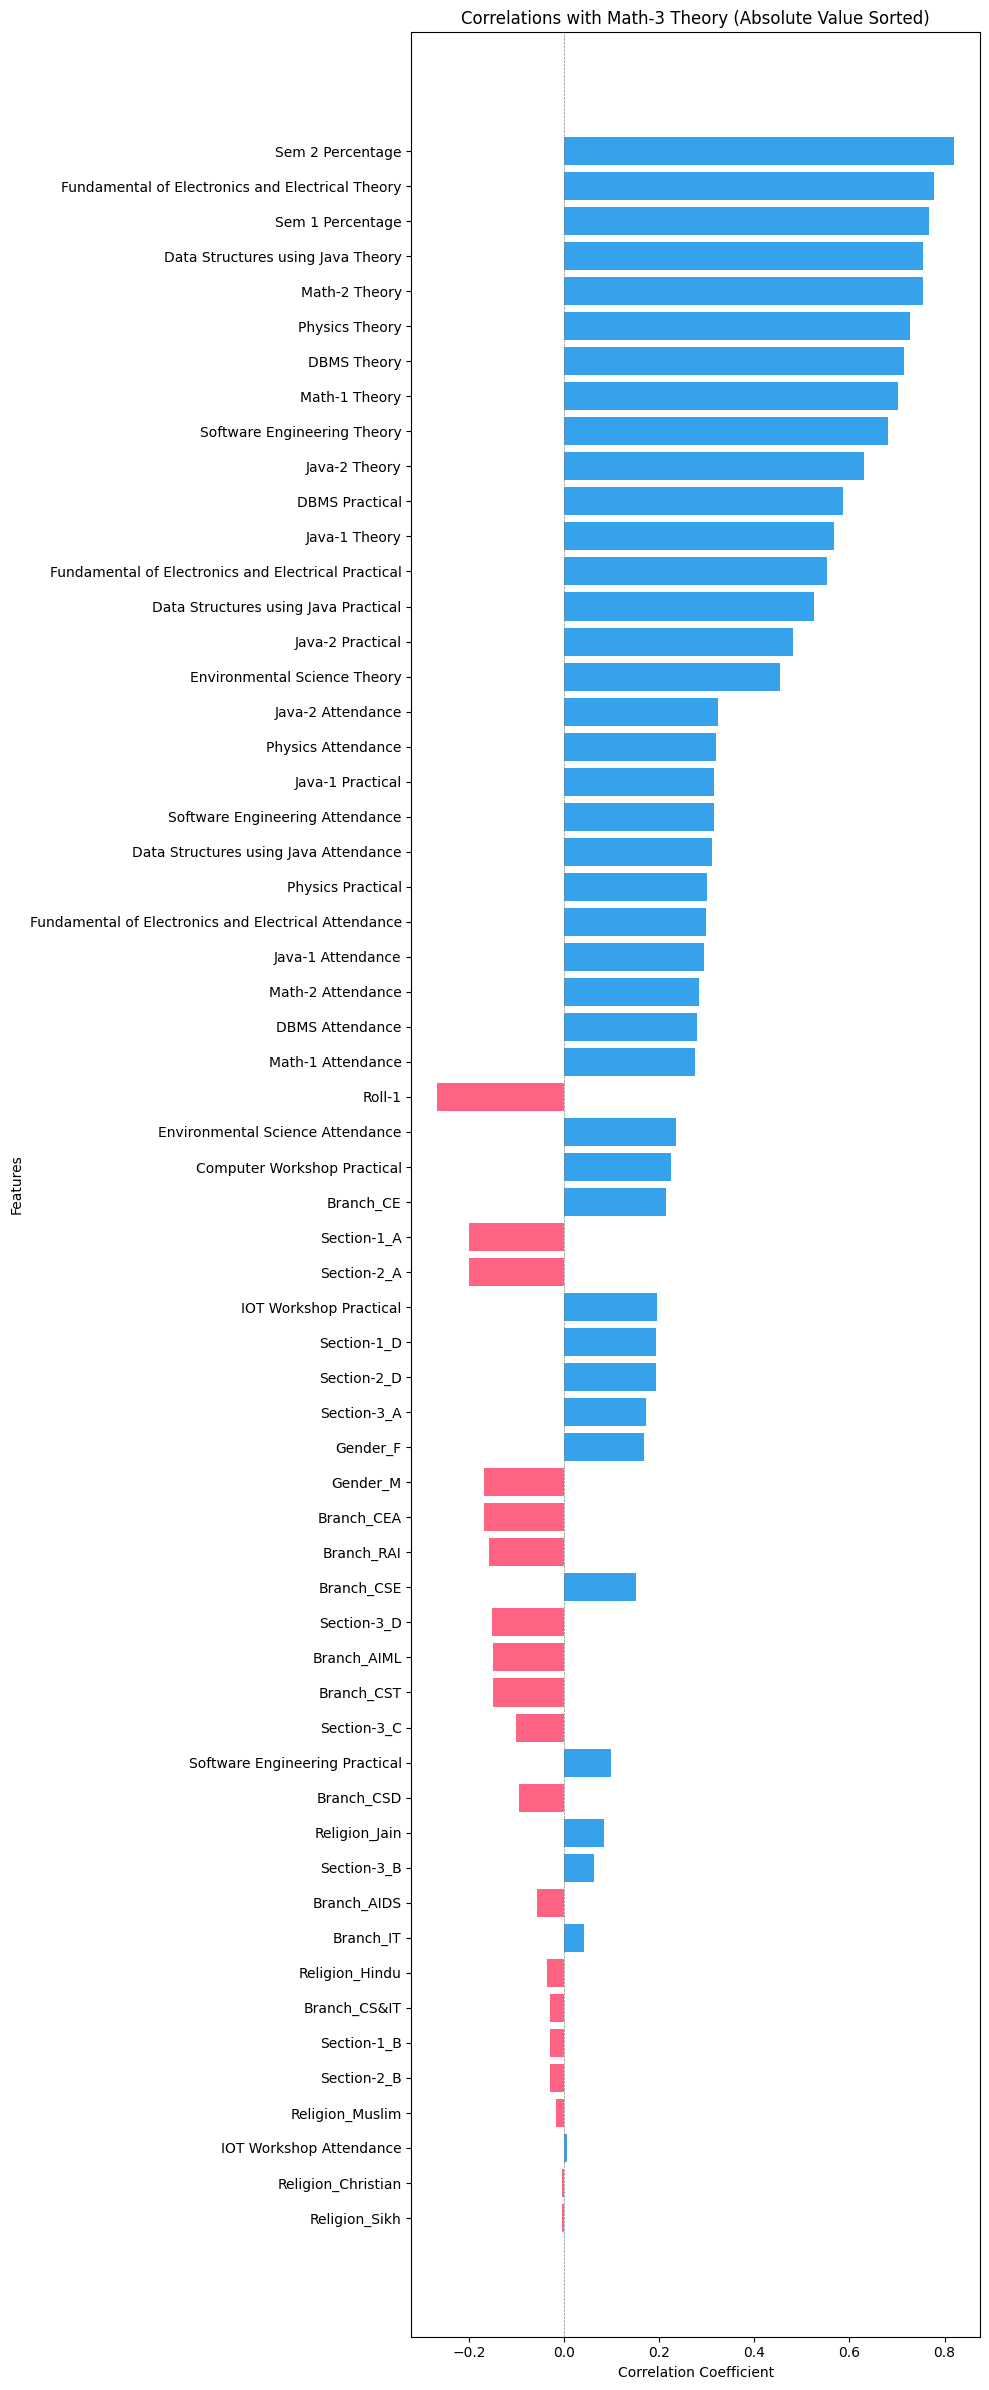

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the math train data
df = pd.read_csv('../train_dataset.csv')

# Drop the irrelevant, data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                        'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                        'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]


# Print the first 5 rows
print("Head of train_dataset.csv:")
print(df.head())

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize a dictionary to store correlations
correlations = {}

# Compute Pearson correlation for numeric columns with Math-3 Theory
for col in numeric_cols:
    if col != 'Math-3 Theory' :  # Exclude the target itself, mentor columns
        corr = df[col].corr(df['Math-3 Theory'])
        correlations[col] = corr

# Encode categorical columns for correlation
for col in categorical_cols:
    if col in ['Gender', 'Religion', 'Branch','Section-1', 'Section-2', 'Section-3']:
        # One-hot encode categorical columns
        encoded = pd.get_dummies(df[col], prefix=col)
        for encoded_col in encoded.columns:
            corr = encoded[encoded_col].corr(df['Math-3 Theory'])
            correlations[encoded_col] = corr

# Convert Roll-1 to numeric and compute correlation
if 'Roll-1' in df.columns:
    corr = df['Roll-1'].astype(float).corr(df['Math-3 Theory'])
    correlations['Roll-1'] = corr

# Sort correlations by absolute value in descending order
sorted_correlations = dict(sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True))

# Print sorted correlations
print("\nCorrelations with Math-3 Theory (sorted by absolute value):")
for col, corr in sorted_correlations.items():
    print(f"{col}: {corr:.4f}")

# Prepare data for plotting
labels = list(sorted_correlations.keys())
values = list(sorted_correlations.values())

# Create a horizontal bar plot
plt.figure(figsize=(10, max(8, len(labels) * 0.4)))  # Adjust height based on number of features
plt.barh(labels[::-1], values[::-1], color=np.where(np.array(values[::-1]) >= 0, '#36A2EB', '#FF6384'))
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.title('Correlations with Math-3 Theory (Absolute Value Sorted)')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

Head of math_train_data.csv:
  Gender Religion Branch Section-1 Section-2 Section-3  Roll-1  Math-1 Theory  \
0      M    Hindu     CE         D         D         A     350             47   
1      F    Hindu    CST         B         B         D      18             84   
2      F    Hindu   AIML         A         A         C      23             74   
3      M    Hindu    CST         B         B         D     212             55   
4      M    Hindu    CST         B         B         D     208             38   

   Physics Theory  Physics Practical  ...  Environmental Science Attendance  \
0              48                 75  ...                            100.00   
1              83                 81  ...                            100.00   
2              85                 86  ...                             92.31   
3              69                 82  ...                            100.00   
4              59                 74  ...                            100.00   

   IOT Wo

m:\All Personal Projects\PG\SubjectModels\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
m:\All Personal Projects\PG\SubjectModels\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



Initial VIF values:
                                              feature       VIF
2                                       Math-1 Theory       inf
32                                   Sem 1 Percentage       inf
3                                      Physics Theory       inf
5                                       Java-1 Theory       inf
7                         Software Engineering Theory       inf
15                                        DBMS Theory       inf
17   Fundamental of Electronics and Electrical Theory       inf
12                                      Math-2 Theory       inf
13                  Data Structures using Java Theory       inf
19                                      Java-2 Theory       inf
33                                   Sem 2 Percentage       inf
14               Data Structures using Java Practical  9.755843
20                                   Java-2 Practical  8.746784
16                                     DBMS Practical  8.082221
24                 

m:\All Personal Projects\PG\SubjectModels\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping 'DBMS Theory' with VIF: inf
Dropping 'Sem 2 Percentage' with VIF: 89.39
Dropping 'Sem 1 Percentage' with VIF: 35.88

All remaining features have VIF below threshold.

Columns to drop based on VIF > 10 :
['Math-1 Theory', 'DBMS Theory', 'Sem 2 Percentage', 'Sem 1 Percentage']

Shape of df_encoded: (724, 55)
Shape of df_reduced_vif: (724, 51)

Remaining columns after VIF reduction:
['Roll-1', 'Physics Theory', 'Physics Practical', 'Java-1 Theory', 'Java-1 Practical', 'Software Engineering Theory', 'Software Engineering Practical', 'Environmental Science Theory', 'IOT Workshop Practical', 'Computer Workshop Practical', 'Math-2 Theory', 'Data Structures using Java Theory', 'Data Structures using Java Practical', 'DBMS Practical', 'Fundamental of Electronics and Electrical Theory', 'Fundamental of Electronics and Electrical Practical', 'Java-2 Theory', 'Java-2 Practical', 'Math-1 Attendance', 'Physics Attendance', 'Java-1 Attendance', 'Software Engineering Attendance', 'Environment

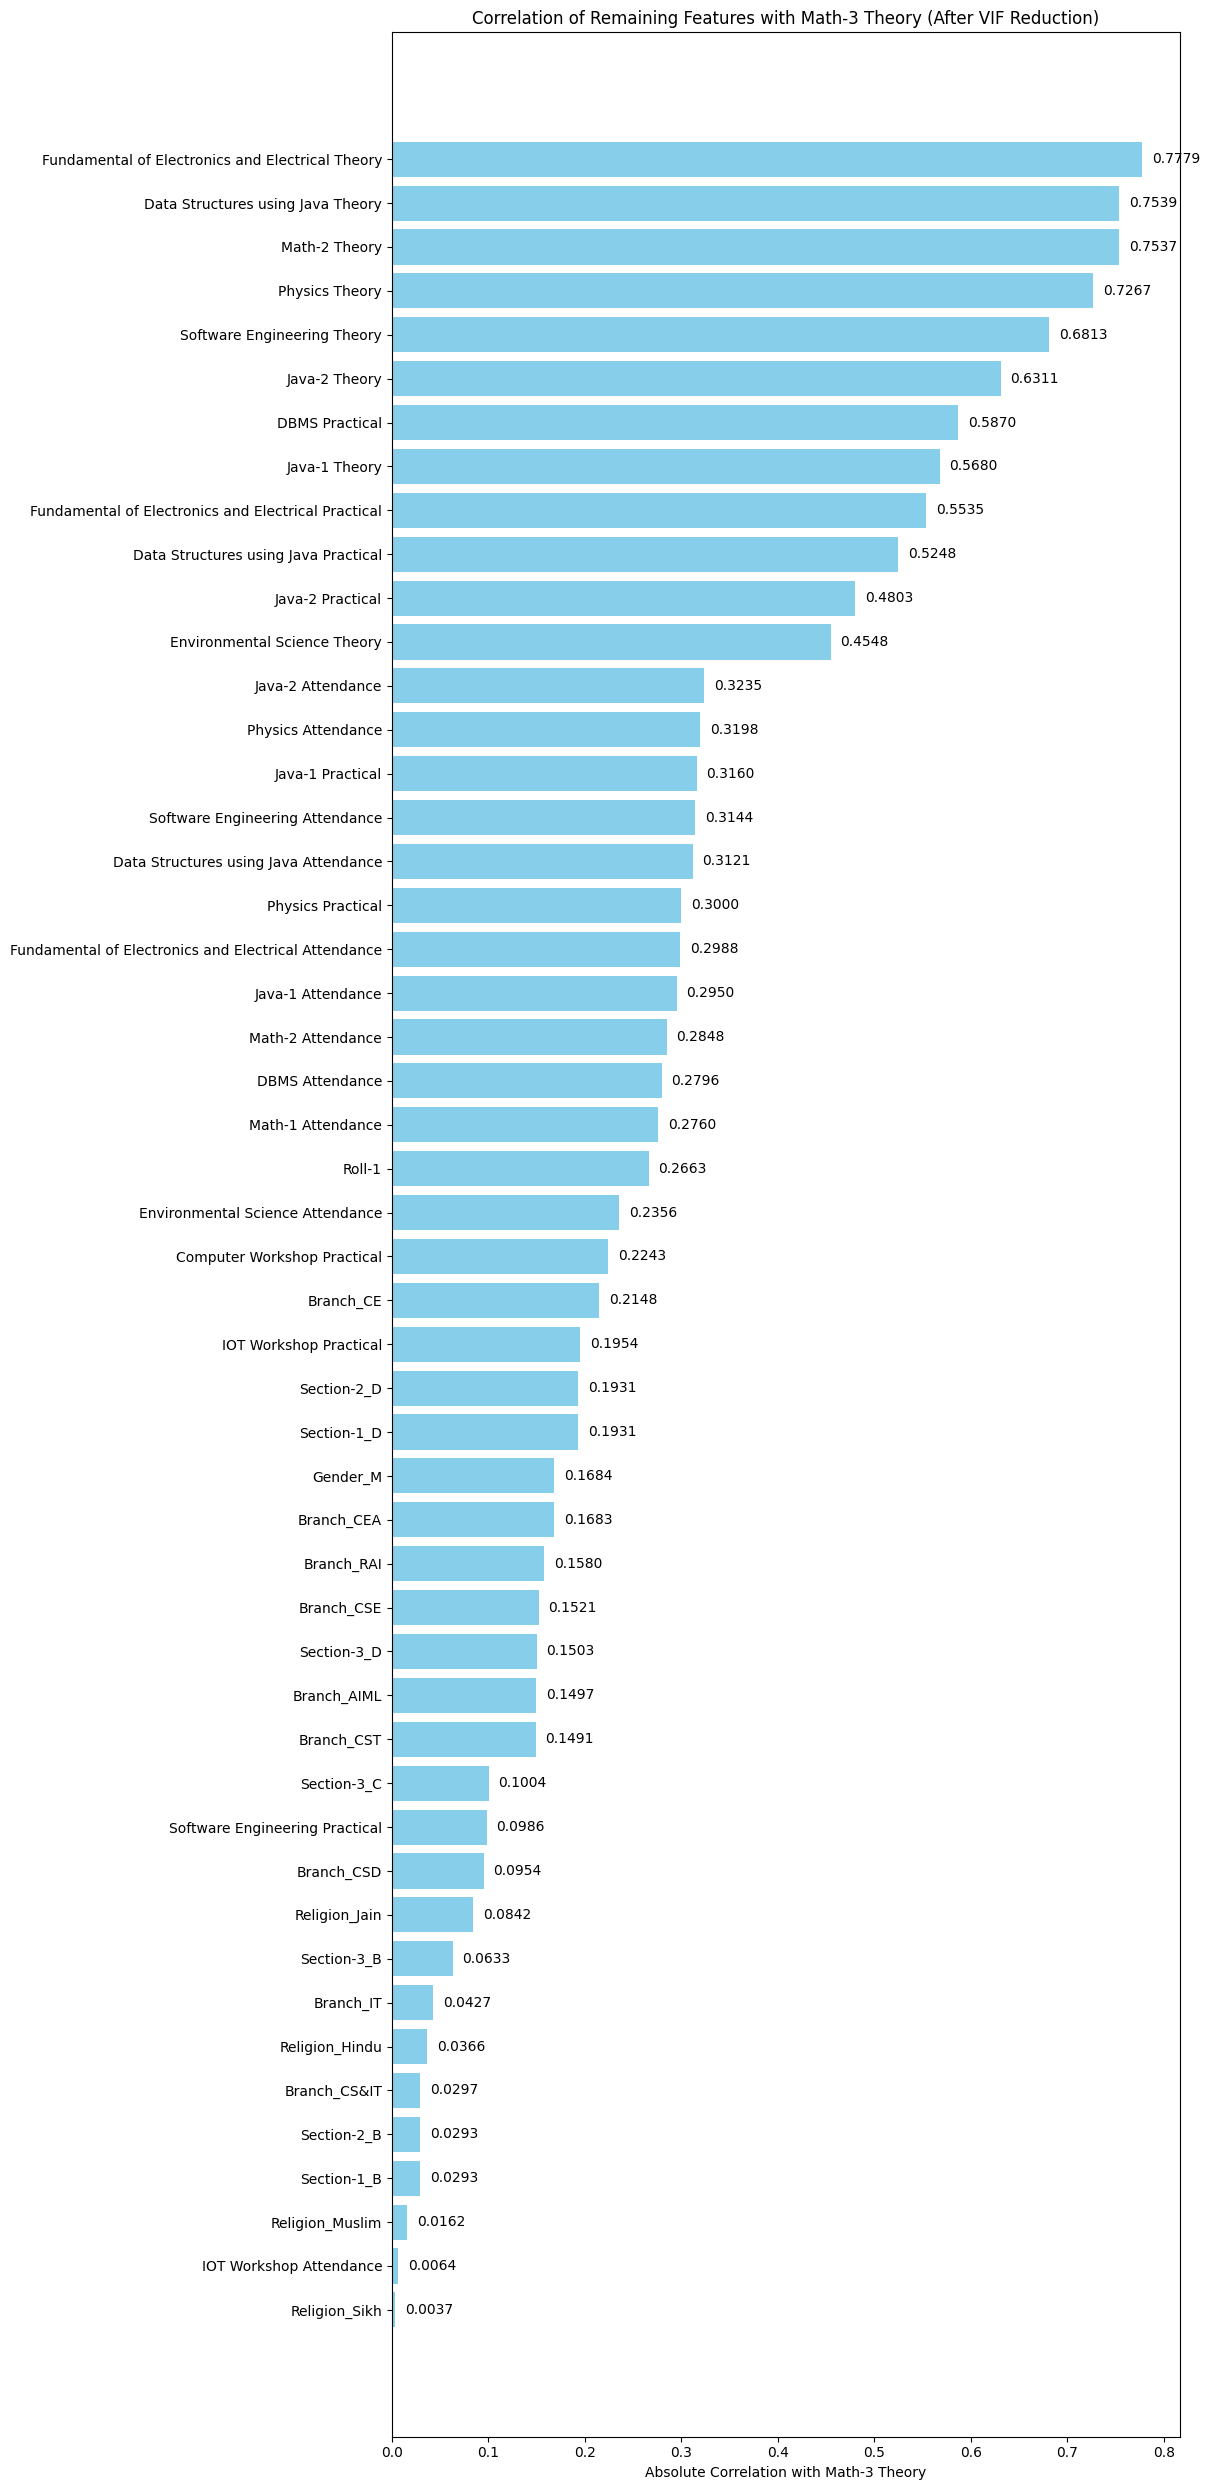


Final selected features (excluding target):
['Roll-1', 'Physics Theory', 'Physics Practical', 'Java-1 Theory', 'Java-1 Practical', 'Software Engineering Theory', 'Software Engineering Practical', 'Environmental Science Theory', 'IOT Workshop Practical', 'Computer Workshop Practical', 'Math-2 Theory', 'Data Structures using Java Theory', 'Data Structures using Java Practical', 'DBMS Practical', 'Fundamental of Electronics and Electrical Theory', 'Fundamental of Electronics and Electrical Practical', 'Java-2 Theory', 'Java-2 Practical', 'Math-1 Attendance', 'Physics Attendance', 'Java-1 Attendance', 'Software Engineering Attendance', 'Environmental Science Attendance', 'IOT Workshop Attendance', 'Math-2 Attendance', 'Data Structures using Java Attendance', 'DBMS Attendance', 'Fundamental of Electronics and Electrical Attendance', 'Java-2 Attendance', 'Gender_M', 'Religion_Hindu', 'Religion_Jain', 'Religion_Muslim', 'Religion_Sikh', 'Branch_AIML', 'Branch_CE', 'Branch_CEA', 'Branch_CS&IT

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Ensure plots display inline in Jupyter Notebook
# %matplotlib inline # This line is for Jupyter Notebook, will cause error if run as a script

# Read the math train data
try:
    df = pd.read_csv('../train_dataset.csv')
except FileNotFoundError:
    print("Error: 'train_dataset.csv' not found. Please ensure the file path is correct.")
    exit()


# Drop the irrelevant, data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3',
                      'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical',
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory',
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Assuming values are strings like 'A4', 'C5', etc.
for section in ['Section-1', 'Section-2', 'Section-3']:
    if section in df.columns: # Check if column exists
        df[section] = df[section].astype(str).str[0] # Ensure it's string type before .str accessor

# Print the first 5 rows
print("Head of math_train_data.csv:")
print(df.head())

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create a DataFrame for VIF calculations (including one-hot encoded categoricals)
df_encoded = df.copy()
for col in categorical_cols:
    if col in ['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3']:
        try:
            encoded = pd.get_dummies(df[col], prefix=col, drop_first=True) # drop_first to avoid perfect multicollinearity
            df_encoded = pd.concat([df_encoded, encoded], axis=1)
            df_encoded = df_encoded.drop(columns=[col])
        except Exception as e:
            print(f"Could not encode column {col}: {e}")


# Ensure all columns are numeric for VIF calculation and handle potential NaNs
df_for_vif = df_encoded.drop(columns=['Math-3 Theory'], errors='ignore').copy()
df_for_vif = df_for_vif.select_dtypes(include=[np.number]) # Select only numeric columns
df_for_vif = df_for_vif.fillna(df_for_vif.mean()) # Fill NaNs with mean, or choose another strategy

# Add constant for VIF calculation if not already present (VIF expects an intercept)
# However, VIF is typically calculated on the independent variables.
# If 'Math-3 Theory' is your target, you calculate VIF on the features.
X_vif = df_for_vif.copy()

# Check if 'Math-3 Theory' is in the original df_encoded to calculate correlations later
target_variable = 'Math-3 Theory'
if target_variable not in df_encoded.columns:
    print(f"Warning: Target variable '{target_variable}' not found in df_encoded. Correlations with target cannot be computed.")
    correlations_with_math = {}
else:
    # 1. Create dictionary of absolute correlations with Math-3 Theory
    correlations_with_math = {}
    for col in df_encoded.columns:
        if col != target_variable and pd.api.types.is_numeric_dtype(df_encoded[col]): # Ensure column is numeric
            try:
                corr = abs(df_encoded[col].corr(df_encoded[target_variable]))
                correlations_with_math[col] = corr
            except Exception as e:
                print(f"Could not calculate correlation for {col} with {target_variable}: {e}")
        elif col != target_variable:
            print(f"Skipping non-numeric column {col} for correlation with {target_variable}.")


# Print the correlation dictionary (sorted by absolute value)
print("\nAbsolute correlations with Math-3 Theory:")
if correlations_with_math:
    for col, corr in sorted(correlations_with_math.items(), key=lambda x: x[1], reverse=True):
        print(f"{col}: {corr:.4f}")
else:
    print("No correlations to display.")

# --- VIF Calculation ---
print("\nCalculating VIF...")
# Add constant term for VIF calculation (intercept) if your model will have one.
# VIF is calculated on the independent variables.
X_vif_const = add_constant(X_vif, has_constant='add') # Adds a constant column for intercept

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_const.values, i) for i in range(X_vif_const.shape[1])]
vif_data = vif_data[vif_data["feature"] != 'const'] # Remove const VIF
print("\nInitial VIF values:")
print(vif_data.sort_values(by="VIF", ascending=False))

# Iteratively remove features with VIF > threshold (e.g., 5 or 10)
threshold_vif = 10
columns_to_drop_vif = []
features_for_vif_iter = X_vif.copy() # Start with all features (excluding target)

while True:
    if features_for_vif_iter.empty or features_for_vif_iter.shape[1] < 2: # Need at least 2 features for VIF
        print("\nNot enough features to calculate VIF or all high VIF features removed.")
        break

    # Add constant for VIF calculation in each iteration
    temp_X_vif_const = add_constant(features_for_vif_iter, has_constant='add')
    
    vif_iter = pd.DataFrame()
    vif_iter["feature"] = temp_X_vif_const.columns
    try:
        vif_iter["VIF"] = [variance_inflation_factor(temp_X_vif_const.values, i) for i in range(temp_X_vif_const.shape[1])]
    except Exception as e: # Catch potential errors like singular matrix
        print(f"Error calculating VIF: {e}. Stopping VIF reduction.")
        break

    vif_iter = vif_iter[vif_iter["feature"] != 'const'] # Remove const
    max_vif_row = vif_iter.sort_values(by="VIF", ascending=False).iloc[0]

    if max_vif_row["VIF"] > threshold_vif:
        feature_to_drop = max_vif_row["feature"]
        print(f"Dropping '{feature_to_drop}' with VIF: {max_vif_row['VIF']:.2f}")
        
        # We need to decide how to drop: based purely on VIF or considering correlation with target
        # Original logic tried to keep feature more correlated with target.
        # For VIF, typically the highest VIF feature is dropped.
        # Let's stick to dropping the highest VIF feature first.
        # If you want to incorporate correlation with target, the logic would be more complex:
        # e.g., among features with VIF > threshold, drop the one with lowest corr with target.
        
        columns_to_drop_vif.append(feature_to_drop)
        features_for_vif_iter = features_for_vif_iter.drop(columns=[feature_to_drop])
    else:
        print("\nAll remaining features have VIF below threshold.")
        break

print("\nColumns to drop based on VIF >", threshold_vif, ":")
print(columns_to_drop_vif if columns_to_drop_vif else "No columns to drop based on VIF.")

# Create reduced DataFrame after VIF
df_reduced_vif = df_encoded.drop(columns=columns_to_drop_vif, errors='ignore')
print(f"\nShape of df_encoded: {df_encoded.shape}")
print(f"Shape of df_reduced_vif: {df_reduced_vif.shape}")
print("\nRemaining columns after VIF reduction:")
print(df_reduced_vif.columns.tolist())


# 3. Plot correlations as a bar plot (using original correlations, for features remaining after VIF)
# Update correlations_with_math to only include remaining features
correlations_remaining = {
    col: corr for col, corr in correlations_with_math.items()
    if col in df_reduced_vif.columns and col != target_variable
}


if correlations_remaining:
    plt.figure(figsize=(12, max(8, len(correlations_remaining) * 0.5))) # Adjust height based on number of features
    sorted_correlations_remaining = dict(sorted(correlations_remaining.items(), key=lambda item: item[1]))

    bars = plt.barh(list(sorted_correlations_remaining.keys()),
                    list(sorted_correlations_remaining.values()),
                    color='skyblue')
    plt.xlabel(f'Absolute Correlation with {target_variable}')
    plt.title(f'Correlation of Remaining Features with {target_variable} (After VIF Reduction)')
    plt.tight_layout()

    # Add correlation values on the bars
    for bar_obj in bars: # Renamed 'bar' to 'bar_obj' to avoid conflict
        width = bar_obj.get_width()
        plt.text(x=width + 0.01, y=bar_obj.get_y() + bar_obj.get_height()/2, s=f'{width:.4f}',
                 ha='left', va='center')
    plt.show()
else:
    print("\nNo correlations to plot after VIF reduction or target variable issues.")

print("\nFinal selected features (excluding target):")
final_features = [col for col in df_reduced_vif.columns if col != target_variable]
print(final_features)

# Multiple Linear Regression

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

# Read the math train data
df = pd.read_csv('../train_dataset.csv')

# Drop the irrelevant, data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                        'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                        'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(df, columns=["Gender", "Religion", "Branch",'Section-1', 'Section-2', 'Section-3'], drop_first=True)


# Define target and feature columns
target_col = 'Math-3 Theory'

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize linear regression model
model = LinearRegression()

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores across folds
neg_mae_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert to positive MAE values
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results to terminal
print("Model: Multiple Linear Regression")
print("Approach: multivariate regression with 5-Fold Cross-Validation and one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV log
results_df = pd.DataFrame([{
    "Model": "Multiple Linear Regression",
    "Approach": "5-Fold CV + one-hot encoding",
    "MAE": round(mean_mae, 4)
}])

# Append to CSV or create if it doesn't exist
results_df.to_csv("model_results_log.csv", mode='a', header=not pd.io.common.file_exists("model_results_log.csv"), index=False)


Model: Multiple Linear Regression
Approach: multivariate regression with 5-Fold Cross-Validation and one-hot encoding
MAE: 6.6619


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

# Read the math train data
df = pd.read_csv('../train_dataset.csv')

# Drop the irrelevant, data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                        'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                        'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(df, columns=["Gender", "Religion", "Branch",'Section-1', 'Section-2', 'Section-3'], drop_first=True)

# Without dropping High VIF columns: MAE: 6.6619

# drop columns with too high VIF
columns_to_drop = ['Math-1 Theory', 'DBMS Theory', 'Sem 2 Percentage', 'Sem 1 Percentage']

# Drop columns, ignoring those not found
df_encoded = df_encoded.drop(columns=columns_to_drop, errors='ignore')

# Define target and feature columns
target_col = 'Math-3 Theory'

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize linear regression model
model = LinearRegression()

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores across folds
neg_mae_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert to positive MAE values
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results to terminal
print("Model: Multiple Linear Regression (High VIF columns dropped)")
print("Approach: Multivariate regression with 5-Fold Cross-Validation and one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV log
results_df = pd.DataFrame([{
    "Model": "Multiple Linear Regression (High VIF columns dropped)",
    "Approach": "5-Fold CV + one-hot encoding",
    "MAE": round(mean_mae, 4)
}])

# Append to CSV or create if it doesn't exist
results_df.to_csv("model_results_log.csv", mode='a', header=not pd.io.common.file_exists("model_results_log.csv"), index=False)

Model: Multiple Linear Regression (High VIF columns dropped)
Approach: Multivariate regression with 5-Fold Cross-Validation and one-hot encoding
MAE: 6.6735


# Polynomial Regression

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Read the math train data
df = pd.read_csv('../train_dataset.csv')

# Drop the irrelevant, data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                        'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                        'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(df, columns=["Gender", "Religion", "Branch",'Section-1', 'Section-2', 'Section-3'], drop_first=True)

# Define target and feature columns
target_col = 'Math-3 Theory'

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 2)
polyreg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(polyreg, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 2)")
print("Approach: Full-feature polynomial regression (degree 2) with 5-Fold CV and one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame([{
    "Model": "Polynomial Regression (Order 2)",
    "Approach": "5-Fold CV + one-hot encoding + degree 2",
    "MAE": round(mean_mae, 4)
}])
results_df.to_csv("model_results_log.csv", mode='a', header=not pd.io.common.file_exists("model_results_log.csv"), index=False)

Model: Polynomial Regression (Order 2)
Approach: Full-feature polynomial regression (degree 2) with 5-Fold CV and one-hot encoding
MAE: 29.1336


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Read the math train data
df = pd.read_csv('../train_dataset.csv')

# Drop the irrelevant, data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                        'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                        'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(df, columns=["Gender", "Religion", "Branch",'Section-1', 'Section-2', 'Section-3'], drop_first=True)

# drop columns with too high VIF
columns_to_drop = ['Math-1 Theory', 'DBMS Theory', 'Sem 2 Percentage', 'Sem 1 Percentage']

# Drop columns, ignoring those not found
df_encoded = df_encoded.drop(columns=columns_to_drop, errors='ignore')

# Define target and feature columns
target_col = 'Math-3 Theory'

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 2)
polyreg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(polyreg, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 2, High VIF columns dropped)")
print("Approach: Full-feature polynomial regression (degree 2) with 5-Fold CV, one-hot encoding, and high VIF columns dropped")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame([{
    "Model": "Polynomial Regression (Order 2, High VIF columns dropped)",
    "Approach": "5-Fold CV + one-hot encoding + degree 2 + high VIF columns dropped",
    "MAE": round(mean_mae, 4)
}])
results_df.to_csv("model_results_log.csv", mode='a', header=not pd.io.common.file_exists("model_results_log.csv"), index=False)

Model: Polynomial Regression (Order 2, High VIF columns dropped)
Approach: Full-feature polynomial regression (degree 2) with 5-Fold CV, one-hot encoding, and high VIF columns dropped
MAE: 30.4490


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Read the math train data
df = pd.read_csv('../train_dataset.csv')

# Drop the irrelevant, data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                        'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                        'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Assuming values are strings like 'A4', 'C5', etc.
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(df, columns=["Gender", "Religion", "Branch",'Section-1', 'Section-2', 'Section-3'], drop_first=True)

# Define target and feature columns
target_col = 'Math-3 Theory'

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 3)
polyreg = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(polyreg, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 3)")
print("Approach: Full-feature polynomial regression (degree 3) with 5-Fold CV and one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame([{
    "Model": "Polynomial Regression (Order 3)",
    "Approach": "5-Fold CV + one-hot encoding + degree 3",
    "MAE": round(mean_mae, 4)
}])
results_df.to_csv("model_results_log.csv", mode='a', header=not pd.io.common.file_exists("model_results_log.csv"), index=False)

Model: Polynomial Regression (Order 3)
Approach: Full-feature polynomial regression (degree 3) with 5-Fold CV and one-hot encoding
MAE: 16.6254


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Read the math train data
df = pd.read_csv('../train_dataset.csv')

# Drop the irrelevant, data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                        'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                        'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Assuming values are strings like 'A4', 'C5', etc.
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(df, columns=["Gender", "Religion", "Branch",'Section-1', 'Section-2', 'Section-3'], drop_first=True)

# drop columns with too high VIF
columns_to_drop = ['Math-1 Theory', 'DBMS Theory', 'Sem 2 Percentage', 'Sem 1 Percentage']

# Drop columns, ignoring those not found
df_encoded = df_encoded.drop(columns=columns_to_drop, errors='ignore')


# Define target and feature columns
target_col = 'Math-3 Theory'

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 3)
polyreg = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(polyreg, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 3, High VIF columns dropped)")
print("Approach: Full-feature polynomial regression (degree 3) with 5-Fold CV, one-hot encoding, and high VIF columns dropped")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame([{
    "Model": "Polynomial Regression (Order 3, High VIF columns dropped)",
    "Approach": "5-Fold CV + one-hot encoding + degree 3 + high VIF columns dropped",
    "MAE": round(mean_mae, 4)
}])
results_df.to_csv("model_results_log.csv", mode='a', header=not pd.io.common.file_exists("model_results_log.csv"), index=False)

Model: Polynomial Regression (Order 3, High VIF columns dropped)
Approach: Full-feature polynomial regression (degree 3) with 5-Fold CV, one-hot encoding, and high VIF columns dropped
MAE: 17.1186


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Read the math train data
df = pd.read_csv('../train_dataset.csv')

# Drop the irrelevant, data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                        'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                        'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Assuming values are strings like 'A4', 'C5', etc.
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(df, columns=["Gender", "Religion", "Branch",'Section-1', 'Section-2', 'Section-3'], drop_first=True)

# Define target and feature columns
target_col = 'Math-3 Theory'

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 4)
polyreg = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(polyreg, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 4)")
print("Approach: Full-feature polynomial regression (degree 4) with 5-Fold CV and one-hot encoding")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame([{
    "Model": "Polynomial Regression (Order 4)",
    "Approach": "5-Fold CV + one-hot encoding + degree 4",
    "MAE": round(mean_mae, 4)
}])
results_df.to_csv("model_results_log.csv", mode='a', header=not pd.io.common.file_exists("model_results_log.csv"), index=False)

Model: Polynomial Regression (Order 4)
Approach: Full-feature polynomial regression (degree 4) with 5-Fold CV and one-hot encoding
MAE: 15.5107


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# Read the math train data
df = pd.read_csv('../train_dataset.csv')

# Drop the irrelevant, data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                        'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                        'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']

# Calculate Semester 1 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']

# Calculate Semester 2 Percentage as the average of core subject scores
# scores are numerical and out of 100
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Rounded percentages to 2 decimal places for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Assuming values are strings like 'A4', 'C5', etc.
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(df, columns=["Gender", "Religion", "Branch",'Section-1', 'Section-2', 'Section-3'], drop_first=True)

# drop columns with too high VIF
columns_to_drop = ['Math-1 Theory', 'DBMS Theory', 'Sem 2 Percentage', 'Sem 1 Percentage']

# Drop columns, ignoring those not found
df_encoded = df_encoded.drop(columns=columns_to_drop, errors='ignore')

# Define target and feature columns
target_col = 'Math-3 Theory'

# All remaining columns except target are used as features
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Initialize polynomial regression (order 4)
polyreg = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())

# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute Negative MAE scores
neg_mae_scores = cross_val_score(polyreg, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert to positive MAE
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Polynomial Regression (Order 4, High VIF columns dropped)")
print("Approach: Full-feature polynomial regression (degree 4) with 5-Fold CV, one-hot encoding, and high VIF columns dropped")
print(f"MAE: {mean_mae:.4f}")

# Store results to CSV
results_df = pd.DataFrame([{
    "Model": "Polynomial Regression (Order 4, High VIF columns dropped)",
    "Approach": "5-Fold CV + one-hot encoding + degree 4 + high VIF columns dropped",
    "MAE": round(mean_mae, 4)
}])
results_df.to_csv("model_results_log.csv", mode='a', header=not pd.io.common.file_exists("model_results_log.csv"), index=False)

Model: Polynomial Regression (Order 4, High VIF columns dropped)
Approach: Full-feature polynomial regression (degree 4) with 5-Fold CV, one-hot encoding, and high VIF columns dropped
MAE: 15.5209


# Random forest regressor

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
import os
import warnings

# Read the math train data
df = pd.read_csv('../train_dataset.csv')

# Drop the irrelevant, data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                      'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']

# Calculate Semester 1 Percentage as the average of core subject scores
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']

# Calculate Semester 2 Percentage as the average of core subject scores
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Round percentages to 2 decimal places for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename columns Div-1, Div-2, Div-3 to Section-1, Section-2, Section-3
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Transform values in Section-1, Section-2, Section-3 to keep only the first character
# Thus we get Only Department
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# One-hot encode categorical columns and drop the first column of each
df_encoded = pd.get_dummies(df, columns=['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3'], drop_first=True)

# Didn't drop columns with high internal correlation because tree based structures handel them well

# Define target and feature columns
target_col = 'Math-3 Theory'
feature_cols = [col for col in df_encoded.columns if col != target_col]

X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Define model pipeline (no preprocessor needed since categorical columns are already encoded)
model = Pipeline(
    steps=[
        ('regressor', RandomForestRegressor(random_state=42)),
    ]
)

# Use 5-Fold CV with negative MAE
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Suppress specific sklearn warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')
    neg_mae_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')

mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results to terminal
print('Model: Random Forest Regressor')
print('Approach: Full-feature regression with 5-Fold CV and OneHotEncoding')
print(f'MAE: {mean_mae:.4f}')

# Log results to CSV
results_df = pd.DataFrame(
    [
        {
            'Model': 'Random Forest Regressor',
            'Approach': 'Full-feature regression with 5-Fold CV and OneHotEncoding',
            'MAE': round(mean_mae, 4),
        }
    ]
)

log_file = 'model_results_log.csv'
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)

Model: Random Forest Regressor
Approach: Full-feature regression with 5-Fold CV and OneHotEncoding
MAE: 6.8736


In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Read the math train data
df = pd.read_csv('../train_dataset.csv')

# Drop irrelevant or data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                      'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Round for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename divisions to sections
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Extract department letters from section fields
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# Define target and features
target_col = 'Math-3 Theory'
X = df.drop(columns=[target_col])
y = df[target_col]

# Categorical columns to encode
categorical_cols = ['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Define model pipeline
tuned_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200,
        min_samples_split=2,
        min_samples_leaf=2,
        max_features='sqrt',
        max_depth=20,
        random_state=42
    ))
])

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mae_scores = cross_val_score(tuned_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Output
print("Model: Random Forest Regressor (Tuned)")
print("Parameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 2, "
      "'regressor__min_samples_leaf': 2, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 20}")
print(f"MAE: {mean_mae:.4f}")

# Log results
results_df = pd.DataFrame([{
    "Model": "Random Forest Regressor (Tuned)",
    "Approach": "{'regressor__n_estimators': 200, 'regressor__min_samples_split': 2, "
                "'regressor__min_samples_leaf': 2, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 20}",
    "MAE": round(mean_mae, 4)
}])

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)


Model: Random Forest Regressor (Tuned)
Parameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 2, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 20}
MAE: 6.8051


In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Read the math train data
df = pd.read_csv('../train_dataset.csv')

# Drop irrelevant or data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                      'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Round for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename divisions to sections
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Extract department letters from section fields
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# Define target and features
target_col = 'Math-3 Theory'
X = df.drop(columns=[target_col])
y = df[target_col]

# Categorical columns to encode
categorical_cols = ['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Define model pipeline with updated hyperparameters
tuned_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=1000,
        min_samples_split=5,
        min_samples_leaf=4,
        max_features=None,
        max_depth=None,
        random_state=42
    ))
])

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mae_scores = cross_val_score(tuned_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Output
print("Model: Random Forest Regressor (Tuned)")
print("Parameters: {'regressor__n_estimators': 1000, 'regressor__min_samples_split': 5, "
      "'regressor__min_samples_leaf': 4, 'regressor__max_features': None, 'regressor__max_depth': None}")
print(f"MAE: {mean_mae:.4f}")

# Log results
results_df = pd.DataFrame([{
    "Model": "Random Forest Regressor (Tuned)",
    "Approach": "{'regressor__n_estimators': 1000, 'regressor__min_samples_split': 5, "
                "'regressor__min_samples_leaf': 4, 'regressor__max_features': None, 'regressor__max_depth': None}",
    "MAE": round(mean_mae, 4)
}])

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)


Model: Random Forest Regressor (Tuned)
Parameters: {'regressor__n_estimators': 1000, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 4, 'regressor__max_features': None, 'regressor__max_depth': None}
MAE: 6.8434


In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Read the math train data
df = pd.read_csv('../train_dataset.csv')

# Drop irrelevant or data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                      'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Round for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename divisions to sections
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Extract department letters from section fields
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# Define target and features
target_col = 'Math-3 Theory'
X = df.drop(columns=[target_col])
y = df[target_col]

# Categorical columns to encode
categorical_cols = ['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Define model pipeline with the specified tuned hyperparameters
tuned_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=500,
        min_samples_split=10,
        min_samples_leaf=3,
        max_features=0.5,
        max_depth=None,
        random_state=42
    ))
])

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mae_scores = cross_val_score(tuned_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Output
print("Model: Random Forest Regressor (Tuned)")
print("Parameters: {'regressor__n_estimators': 500, 'regressor__min_samples_split': 10, "
      "'regressor__min_samples_leaf': 3, 'regressor__max_features': 0.5, 'regressor__max_depth': None}")
print(f"MAE: {mean_mae:.4f}")

# Log results
results_df = pd.DataFrame([{
    "Model": "Random Forest Regressor (Tuned)",
    "Approach": "{'regressor__n_estimators': 500, 'regressor__min_samples_split': 10, "
                "'regressor__min_samples_leaf': 3, 'regressor__max_features': 0.5, 'regressor__max_depth': None}",
    "MAE": round(mean_mae, 4)
}])

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)


Model: Random Forest Regressor (Tuned)
Parameters: {'regressor__n_estimators': 500, 'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 3, 'regressor__max_features': 0.5, 'regressor__max_depth': None}
MAE: 6.7528


In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os

# Suppress warnings
warnings.filterwarnings('ignore')

# Read the math train data
df = pd.read_csv('../train_dataset.csv')

# Drop irrelevant or data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                      'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Round for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename divisions to sections
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Extract department letters from section fields
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# Define target and features
target_col = 'Math-3 Theory'
X = df.drop(columns=[target_col])
y = df[target_col]

# Categorical columns to encode
categorical_cols = ['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3']
numeric_cols = [col for col in X.columns if col not in categorical_cols]


# Preprocessing pipeline for encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Define model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define parameter grid for RandomizedSearchCV
param_distributions = {
    'regressor__n_estimators': [100, 200, 500, 1000],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2', None]  # Removed 'auto'
}


# Use 5-Fold CV for tuning
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    model,
    param_distributions,
    n_iter=50,  # Number of parameter settings sampled
    scoring='neg_mean_absolute_error',
    cv=kf,
    random_state=42,
    n_jobs=-1
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X, y)

# Get the best model and parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_score = -random_search.best_score_  # Convert back from neg MAE to MAE

# Print results to terminal
print("Model: Random Forest Regressor(tuned)")
print("Parameters:", best_params)
print(f"MAE: {best_score:.4f}")

# Log results to CSV
results_df = pd.DataFrame([{
    "Model": "Random Forest Regressor (Tuned)",
    "Approach": best_params,
    "MAE": round(best_score, 4)
}])

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)

Model: Random Forest Regressor(tuned)
Parameters: {'regressor__n_estimators': 500, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 2, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 20}
MAE: 6.7841


In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
import os

# Suppress warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('../train_dataset.csv')

# Drop irrelevant or data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3',
                      'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical',
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Add Semester 1 and 2 percentage features
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory',
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename and simplify section columns
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# Define target and features
target_col = 'Math-3 Theory'
X = df.drop(columns=[target_col])
y = df[target_col]

# Categorical and numeric columns
categorical_cols = ['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Define the tuned Random Forest model
tuned_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=1000,
        min_samples_split=10,
        min_samples_leaf=3,
        max_features=0.5,
        max_depth=30,
        random_state=42
    ))
])

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mae_scores = cross_val_score(tuned_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: Random Forest Regressor (Tuned)")
print("Parameters: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 3, "
      "'max_features': 0.5, 'max_depth': 30}")
print(f"MAE: {mean_mae:.4f}")

# Log results
results_df = pd.DataFrame([{
    "Model": "Random Forest Regressor (Tuned)",
    "Approach": "{'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 3, "
                "'max_features': 0.5, 'max_depth': 30}",
    "MAE": round(mean_mae, 4)
}])
log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)


Model: Random Forest Regressor (Tuned)
Parameters: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 0.5, 'max_depth': 30}
MAE: 6.7535


In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
import os

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the correct dataset
df = pd.read_csv('../train_dataset.csv')

# Drop irrelevant or data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3',
                      'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical',
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Create Semester 1 and 2 percentage features
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory',
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Round for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename and simplify section columns
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# Handle outliers in target using IQR
target_col = 'Math-3 Theory'
Q1, Q3 = df[target_col].quantile([0.25, 0.75])
IQR = Q3 - Q1
df = df[~((df[target_col] < Q1 - 1.5 * IQR) | (df[target_col] > Q3 + 1.5 * IQR))]

# Define target and features
X = df.drop(columns=[target_col])
y = df[target_col]

# Categorical and numeric features
categorical_cols = ['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

# Full pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Hyperparameter tuning setup
param_distributions = {
    'regressor__n_estimators': [100, 200, 500],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 3],
    'regressor__max_features': ['sqrt', 0.5, None]
}

# 5-fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Randomized search
random_search = RandomizedSearchCV(
    model,
    param_distributions,
    n_iter=25,
    scoring='neg_mean_absolute_error',
    cv=kf,
    random_state=42,
    n_jobs=-1
)

# Fit model
random_search.fit(X, y)

# Best model and results
best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_score = -random_search.best_score_

# Feature importances
feature_importances = best_model.named_steps['regressor'].feature_importances_
feature_names = (
    best_model.named_steps['preprocessor']
    .named_transformers_['cat']
    .get_feature_names_out(categorical_cols)
    .tolist() + numeric_cols
)
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
print("Feature Importances:\n", importance_df.sort_values(by='Importance', ascending=False))

# Log results
results_df = pd.DataFrame([{
    "Model": "Random Forest Regressor (Tuned)",
    "Approach": best_params,
    "MAE": round(best_score, 4)
}])
log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)

# Output summary
print("Model: Random Forest Regressor (Tuned)")
print("Approach:", best_params)
print(f"MAE: {best_score:.4f}")


Feature Importances:
                                               Feature  Importance
53                                   Sem 2 Percentage    0.155293
32                                      Math-2 Theory    0.118347
33                  Data Structures using Java Theory    0.087378
37   Fundamental of Electronics and Electrical Theory    0.086001
52                                   Sem 1 Percentage    0.077944
23                                     Physics Theory    0.066811
35                                        DBMS Theory    0.053298
22                                      Math-1 Theory    0.047236
27                        Software Engineering Theory    0.039890
36                                     DBMS Practical    0.031186
25                                      Java-1 Theory    0.024594
39                                      Java-2 Theory    0.020092
38  Fundamental of Electronics and Electrical Prac...    0.018204
29                       Environmental Science Theory 

# XGBoost

In [18]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('../train_dataset.csv')

# Drop irrelevant or data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                      'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1).round(2)

# Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1).round(2)

# Rename division columns
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Extract department letters
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# Define target and features
target_col = 'Math-3 Theory'
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = ['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Define the XGBoost pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42, verbosity=0))
])

# 5-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mae_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results
print("Model: XGBoost Regressor")
print("Approach: Cleaned data, engineered Sem1/Sem2 %, OneHotEncoding, 5-Fold CV")
print(f"MAE: {mean_mae:.4f}")

# Log results
results_df = pd.DataFrame([{
    "Model": "XGBoost Regressor",
    "Approach": "Full-feature regression, engineered Sem1/Sem2 %",
    "MAE": round(mean_mae, 4)
}])

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)


Model: XGBoost Regressor
Approach: Cleaned data, engineered Sem1/Sem2 %, OneHotEncoding, 5-Fold CV
MAE: 7.2612


# LightGBM

In [19]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings  # For suppressing warnings
import os

# Suppress all warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('../train_dataset.csv')

# Drop irrelevant or data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3',
                        'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical',
                        'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Add Semester 1 and 2 percentage features
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory',
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename and simplify section columns
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# Define target and features
target_col = 'Math-3 Theory'
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = ['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline for encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Define LightGBM model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor(random_state=42, verbose=-1))
])

# Use 5-Fold CV with negative MAE
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mae_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
mae_scores = -neg_mae_scores
mean_mae = np.mean(mae_scores)

# Print results to terminal
print("Model: LightGBM Regressor")
print("Approach: Full-feature regression with 5-Fold CV and OneHotEncoding")
print(f"MAE: {mean_mae:.4f}")

# Log results to CSV
results_df = pd.DataFrame([{
    "Model": "LightGBM Regressor",
    "Approach": "Full-feature regression with 5-Fold CV and OneHotEncoding",
    "MAE": round(mean_mae, 4)
}])

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)


Model: LightGBM Regressor
Approach: Full-feature regression with 5-Fold CV and OneHotEncoding
MAE: 7.2994


# Ridge Lasso

In [20]:
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os

# Suppress warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('../train_dataset.csv')

# Drop irrelevant or data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                      'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Round for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename divisions to sections
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Extract department letters from section fields
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# Define target and features
target_col = 'Math-3 Theory'
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = ['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline for categorical and numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)  # Standardize numeric features
    ]
)

# Initialize Ridge and Lasso regressors
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))  # Alpha is the regularization strength
])

lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1))  # Alpha is the regularization strength
])

# Use 5-Fold CV with negative MAE for Ridge
kf = KFold(n_splits=5, shuffle=True, random_state=42)
ridge_neg_mae_scores = cross_val_score(ridge_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
ridge_mae_scores = -ridge_neg_mae_scores
ridge_mean_mae = np.mean(ridge_mae_scores)

# Use 5-Fold CV with negative MAE for Lasso
lasso_neg_mae_scores = cross_val_score(lasso_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
lasso_mae_scores = -lasso_neg_mae_scores
lasso_mean_mae = np.mean(lasso_mae_scores)

# Print results to terminal
print("Model: Ridge Regression")
print("Approach: Full-feature regression with 5-Fold CV and Regularization")
print(f"MAE: {ridge_mean_mae:.4f}")

print("\nModel: Lasso Regression")
print("Approach: Full-feature regression with 5-Fold CV and Regularization")
print(f"MAE: {lasso_mean_mae:.4f}")

# Log results to CSV
results_df = pd.DataFrame([
    {
        "Model": "Ridge Regression",
        "Approach": "Full-feature regression with 5-Fold CV and Regularization",
        "MAE": round(ridge_mean_mae, 4)
    },
    {
        "Model": "Lasso Regression",
        "Approach": "Full-feature regression with 5-Fold CV and Regularization",
        "MAE": round(lasso_mean_mae, 4)
    }
])

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)

Model: Ridge Regression
Approach: Full-feature regression with 5-Fold CV and Regularization
MAE: 6.6617

Model: Lasso Regression
Approach: Full-feature regression with 5-Fold CV and Regularization
MAE: 6.6296


In [21]:
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
import os

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3', 
                      'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical', 
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Columns for Semester 1 core subjects
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

# Columns for Semester 2 core subjects
sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory', 
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Round for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename divisions to sections
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Extract department letters from section fields
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# Define target and features
target_col = 'Math-3 Theory'
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = ['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

# Ridge pipeline
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Lasso pipeline
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(max_iter=10000))  # Ensure convergence
])

# Alpha values to try
alpha_grid = {'regressor__alpha': np.logspace(-3, 3, 20)}

# 5-Fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearch for Ridge
ridge_search = GridSearchCV(ridge_pipeline, alpha_grid, cv=kf, scoring='neg_mean_absolute_error', refit=True)
ridge_search.fit(X, y)
ridge_best_mae = -ridge_search.best_score_

# GridSearch for Lasso
lasso_search = GridSearchCV(lasso_pipeline, alpha_grid, cv=kf, scoring='neg_mean_absolute_error', refit=True)
lasso_search.fit(X, y)
lasso_best_mae = -lasso_search.best_score_

# Print results
print("Model: Ridge Regression")
print("Approach: Hyperparameter-tuned full-feature regression with 5-Fold CV")
print(f"Best Alpha: {ridge_search.best_params_['regressor__alpha']}")
print(f"MAE: {ridge_best_mae:.4f}")

print("\nModel: Lasso Regression")
print("Approach: Hyperparameter-tuned full-feature regression with 5-Fold CV")
print(f"Best Alpha: {lasso_search.best_params_['regressor__alpha']}")
print(f"MAE: {lasso_best_mae:.4f}")

# Log results
results_df = pd.DataFrame([
    {
        "Model": "Ridge Regression(tuned)",
        "Approach": "Tuned regression with 5-Fold CV",
        "MAE": round(ridge_best_mae, 4)
    },
    {
        "Model": "Lasso Regression(tuned)",
        "Approach": "Tuned regression with 5-Fold CV",
        "MAE": round(lasso_best_mae, 4)
    }
], columns=["Model", "Approach", "MAE"])  
log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)

Model: Ridge Regression
Approach: Hyperparameter-tuned full-feature regression with 5-Fold CV
Best Alpha: 54.555947811685144
MAE: 6.6215

Model: Lasso Regression
Approach: Hyperparameter-tuned full-feature regression with 5-Fold CV
Best Alpha: 0.1623776739188721
MAE: 6.6270


In [22]:
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3',
                      'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical',
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Feature Engineering: Create Semester 1 & 2 Percentage
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory',
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Round for clarity (optional, mainly for display)
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename divisions to sections
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Extract department letters from section fields
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# Define target and features
target_col = 'Math-3 Theory'
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = ['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline: Using RobustScaler for numeric features to handle potential outliers
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', RobustScaler(), numeric_cols)
    ]
)

# Ridge pipeline
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Lasso pipeline
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(max_iter=10000))
])

# ElasticNet pipeline
elastic_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(max_iter=10000))
])

# Cross-validation strategy: Using RepeatedKFold for more robust evaluation
kf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# --- Hyperparameter Tuning ---

# Initial broad alpha grid for Ridge and Lasso
alpha_grid_broad = {'regressor__alpha': np.logspace(-3, 3, 20)}

# GridSearch for Ridge
ridge_search_broad = GridSearchCV(ridge_pipeline, alpha_grid_broad, cv=kf, scoring='neg_mean_absolute_error', refit=True, n_jobs=-1)
ridge_search_broad.fit(X, y)
ridge_best_alpha_broad = ridge_search_broad.best_params_['regressor__alpha']

# Refined alpha grid for Ridge
ridge_alpha_refined_grid = {'regressor__alpha': np.linspace(max(1e-5, ridge_best_alpha_broad * 0.5), ridge_best_alpha_broad * 1.5, 30)}
ridge_search_refined = GridSearchCV(ridge_pipeline, ridge_alpha_refined_grid, cv=kf, scoring='neg_mean_absolute_error', refit=True, n_jobs=-1)
ridge_search_refined.fit(X, y)
ridge_best_mae = -ridge_search_refined.best_score_

# GridSearch for Lasso
lasso_search_broad = GridSearchCV(lasso_pipeline, alpha_grid_broad, cv=kf, scoring='neg_mean_absolute_error', refit=True, n_jobs=-1)
lasso_search_broad.fit(X, y)
lasso_best_alpha_broad = lasso_search_broad.best_params_['regressor__alpha']

# Refined alpha grid for Lasso
lasso_alpha_refined_grid = {'regressor__alpha': np.linspace(max(1e-5, lasso_best_alpha_broad * 0.5), lasso_best_alpha_broad * 1.5, 30)}
lasso_search_refined = GridSearchCV(lasso_pipeline, lasso_alpha_refined_grid, cv=kf, scoring='neg_mean_absolute_error', refit=True, n_jobs=-1)
lasso_search_refined.fit(X, y)
lasso_best_mae = -lasso_search_refined.best_score_

# GridSearch for ElasticNet
elastic_param_grid = {
    'regressor__alpha': np.logspace(-3, 1, 15),
    'regressor__l1_ratio': np.linspace(0.1, 1.0, 10)
}
elastic_search = GridSearchCV(elastic_pipeline, elastic_param_grid, cv=kf, scoring='neg_mean_absolute_error', refit=True, n_jobs=-1)
elastic_search.fit(X, y)
elastic_best_mae = -elastic_search.best_score_

# --- Print Results ---
print("Model: Ridge Regression(tuned)")
print("Approach: Full-feature regression with Repeated 5-Fold CV and Regularization, alpha selected via two-stage grid search")
print(f"MAE: {ridge_best_mae:.4f}")

print("\nModel: Lasso Regression(tuned)")
print("Approach: Full-feature regression with Repeated 5-Fold CV and Regularization, alpha selected via two-stage grid search")
print(f"MAE: {lasso_best_mae:.4f}")

print("\nModel: ElasticNet Regression(tuned)")
print("Approach: Full-feature regression with Repeated 5-Fold CV and Regularization, alpha and L1 ratio selected via grid search")
print(f"MAE: {elastic_best_mae:.4f}")

# --- Log Results to CSV ---
results_df = pd.DataFrame([
    {
        "Model": "Ridge Regression(tuned)",
        "Approach": "Full-feature regression with Repeated 5-Fold CV and Regularization, alpha selected via two-stage grid search",
        "MAE": round(ridge_best_mae, 4)
    },
    {
        "Model": "Lasso Regression(tuned)",
        "Approach": "Full-feature regression with Repeated 5-Fold CV and Regularization, alpha selected via two-stage grid search",
        "MAE": round(lasso_best_mae, 4)
    },
    {
        "Model": "ElasticNet Regression(tuned)",
        "Approach": "Full-feature regression with Repeated 5-Fold CV and Regularization, alpha and L1 ratio selected via grid search",
        "MAE": round(elastic_best_mae, 4)
    }
], columns=["Model", "Approach", "MAE"])

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)

Model: Ridge Regression(tuned)
Approach: Full-feature regression with Repeated 5-Fold CV and Regularization, alpha selected via two-stage grid search
MAE: 6.6143

Model: Lasso Regression(tuned)
Approach: Full-feature regression with Repeated 5-Fold CV and Regularization, alpha selected via two-stage grid search
MAE: 6.5850

Model: ElasticNet Regression(tuned)
Approach: Full-feature regression with Repeated 5-Fold CV and Regularization, alpha and L1 ratio selected via grid search
MAE: 6.5851


# Ensemble of Ridge Lasso ElasticNet

In [23]:
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor
from skopt import BayesSearchCV
import os

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data-leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3',
                      'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical',
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Feature Engineering: Semester Percentages
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory',
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Round for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename divisions to sections
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Extract department letters from section fields
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# Define target and features
target_col = 'Math-3 Theory'
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = ['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', RobustScaler(), numeric_cols)
    ]
)

# Models and pipelines
ridge_pipeline = Pipeline([('preprocessor', preprocessor), ('regressor', Ridge())])
lasso_pipeline = Pipeline([('preprocessor', preprocessor), ('regressor', Lasso(max_iter=10000))])
elastic_pipeline = Pipeline([('preprocessor', preprocessor), ('regressor', ElasticNet(max_iter=10000))])

# Cross-validation strategy
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

# Bayesian Optimization
param_space = {
    'ridge': {'regressor__alpha': (1e-3, 1e3, 'log-uniform')},
    'lasso': {'regressor__alpha': (1e-3, 1e3, 'log-uniform')},
    'elastic': {
        'regressor__alpha': (1e-3, 1e3, 'log-uniform'),
        'regressor__l1_ratio': (0.05, 1.0, 'uniform')
    }
}

# Ridge Optimization
ridge_search = BayesSearchCV(
    estimator=ridge_pipeline,
    search_spaces=param_space['ridge'],
    n_iter=50,
    cv=kf,
    scoring='neg_mean_absolute_error',
    random_state=42
)
ridge_search.fit(X, y)

# Lasso Optimization
lasso_search = BayesSearchCV(
    estimator=lasso_pipeline,
    search_spaces=param_space['lasso'],
    n_iter=50,
    cv=kf,
    scoring='neg_mean_absolute_error',
    random_state=42
)
lasso_search.fit(X, y)

# ElasticNet Optimization
elastic_search = BayesSearchCV(
    estimator=elastic_pipeline,
    search_spaces=param_space['elastic'],
    n_iter=50,
    cv=kf,
    scoring='neg_mean_absolute_error',
    random_state=42
)
elastic_search.fit(X, y)

# Ensemble Model
ensemble = VotingRegressor([
    ('ridge', ridge_search.best_estimator_),
    ('lasso', lasso_search.best_estimator_),
    ('elastic', elastic_search.best_estimator_)
])
ensemble.fit(X, y)

# Evaluate Performance
ridge_mae = -ridge_search.best_score_
lasso_mae = -lasso_search.best_score_
elastic_mae = -elastic_search.best_score_

print(f"Ridge Regression MAE: {ridge_mae:.4f}")
print(f"Lasso Regression MAE: {lasso_mae:.4f}")
print(f"ElasticNet Regression MAE: {elastic_mae:.4f}")
print(f"Ensemble MAE (on training set): {np.mean(np.abs(y - ensemble.predict(X))):.4f}")

# Log Results
results_df = pd.DataFrame([
    {"Model": "Ridge Regression", "MAE": ridge_mae},
    {"Model": "Lasso Regression", "MAE": lasso_mae},
    {"Model": "ElasticNet Regression", "MAE": elastic_mae},
    {"Model": "Ensemble", "MAE": np.mean(np.abs(y - ensemble.predict(X)))}
])

log_file = "ensemble_model_results.csv"
results_df.to_csv(log_file, index=False, mode='w')


Ridge Regression MAE: 6.6313
Lasso Regression MAE: 6.6104
ElasticNet Regression MAE: 6.6104
Ensemble MAE (on training set): 6.3179


# Ensemble of Ridge Lasso Random forest

In [24]:
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data-leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3',
                      'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical',
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Feature Engineering: Semester Percentages
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory',
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Round for clarity
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename divisions to sections
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Extract department letters from section fields
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# Define target and features
target_col = 'Math-3 Theory'
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = ['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', RobustScaler(), numeric_cols)
    ]
)

# Cross-validation strategy
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

# Define pipelines for individual models
ridge_pipeline = Pipeline([('preprocessor', preprocessor), ('regressor', Ridge())])
lasso_pipeline = Pipeline([('preprocessor', preprocessor), ('regressor', Lasso(max_iter=10000))])
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=500,
        min_samples_split=10,
        min_samples_leaf=3,
        max_features=0.5,
        max_depth=None,
        random_state=42
    ))
])

# Bayesian Optimization for Ridge and Lasso
param_space = {
    'ridge': {'regressor__alpha': (1e-3, 1e3, 'log-uniform')},
    'lasso': {'regressor__alpha': (1e-3, 1e3, 'log-uniform')}
}

# Ridge Optimization
ridge_search = BayesSearchCV(
    estimator=ridge_pipeline,
    search_spaces=param_space['ridge'],
    n_iter=50,
    cv=kf,
    scoring='neg_mean_absolute_error',
    random_state=42
)
ridge_search.fit(X, y)

# Lasso Optimization
lasso_search = BayesSearchCV(
    estimator=lasso_pipeline,
    search_spaces=param_space['lasso'],
    n_iter=50,
    cv=kf,
    scoring='neg_mean_absolute_error',
    random_state=42
)
lasso_search.fit(X, y)

# Ensemble Model with Ridge, Lasso, and Random Forest
ensemble = VotingRegressor([
    ('ridge', ridge_search.best_estimator_),
    ('lasso', lasso_search.best_estimator_),
    ('rf', rf_pipeline)
], weights=[0.3, 0.3, 0.4])  # Weights based on model performance

# Fit ensemble
ensemble.fit(X, y)

# Evaluate Performance
ridge_mae = -ridge_search.best_score_
lasso_mae = -lasso_search.best_score_
rf_scores = cross_val_score(rf_pipeline, X, y, cv=kf, scoring='neg_mean_absolute_error')
rf_mae = -np.mean(rf_scores)
ensemble_scores = cross_val_score(ensemble, X, y, cv=kf, scoring='neg_mean_absolute_error')
ensemble_mae = -np.mean(ensemble_scores)

print(f"Ridge Regression MAE: {ridge_mae:.4f}")
print(f"Lasso Regression MAE: {lasso_mae:.4f}")
print(f"Random Forest MAE: {rf_mae:.4f}")
print(f"Ensemble MAE (CV): {ensemble_mae:.4f}")

# Log Results
results_df = pd.DataFrame([
    {"Model": "Ridge Regression", "MAE": ridge_mae},
    {"Model": "Lasso Regression", "MAE": lasso_mae},
    {"Model": "Random Forest", "MAE": rf_mae},
    {"Model": "Ensemble (Ridge+Lasso+RF)", "MAE": ensemble_mae}
])

log_file = "ensemble_ridge_lasso_rf_results.csv"
results_df.to_csv(log_file, index=False, mode='w')

Ridge Regression MAE: 6.6313
Lasso Regression MAE: 6.6104
Random Forest MAE: 6.7826
Ensemble MAE (CV): 6.5788


In [3]:
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RepeatedKFold, KFold
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../train_dataset.csv")

# Drop irrelevant or data leak columns
df = df.drop(columns=['Student ID', 'Mentor-1', 'Mentor-2', 'Mentor-3', 'Roll-2', 'Roll-3',
                      'DE Theory', 'DE Practical', 'FSD Theory', 'FSD Practical',
                      'Python Theory', 'Python Practical', 'Communication Theory', 'Law Theory'])

# Feature Engineering: Create Semester 1 & 2 Percentage
sem1_columns = ['Math-1 Theory', 'Physics Theory', 'Java-1 Theory', 'Software Engineering Theory']
df['Sem 1 Percentage'] = df[sem1_columns].mean(axis=1)

sem2_columns = ['Math-2 Theory', 'Data Structures using Java Theory', 'DBMS Theory',
                'Fundamental of Electronics and Electrical Theory', 'Java-2 Theory']
df['Sem 2 Percentage'] = df[sem2_columns].mean(axis=1)

# Round for clarity (optional, mainly for display)
df['Sem 1 Percentage'] = df['Sem 1 Percentage'].round(2)
df['Sem 2 Percentage'] = df['Sem 2 Percentage'].round(2)

# Rename divisions to sections
df = df.rename(columns={'Div-1': 'Section-1', 'Div-2': 'Section-2', 'Div-3': 'Section-3'})

# Extract department letters from section fields
for section in ['Section-1', 'Section-2', 'Section-3']:
    df[section] = df[section].str[0]

# Handle outliers in target using IQR
target_col = 'Math-3 Theory'
Q1, Q3 = df[target_col].quantile([0.25, 0.75])
IQR = Q3 - Q1
df = df[~((df[target_col] < Q1 - 1.5 * IQR) | (df[target_col] > Q3 + 1.5 * IQR))]

# Define target and features
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = ['Gender', 'Religion', 'Branch', 'Section-1', 'Section-2', 'Section-3']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# --- Ridge and Lasso Pipeline ---

# Preprocessing pipeline for Ridge and Lasso (RobustScaler)
preprocessor_linear = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_cols),
        ('num', RobustScaler(), numeric_cols)
    ]
)

# Ridge pipeline
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor_linear),
    ('regressor', Ridge())
])

# Lasso pipeline
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor_linear),
    ('regressor', Lasso(max_iter=10000))
])

# Cross-validation strategy for Ridge and Lasso
kf_linear = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Two-stage alpha grid for Ridge and Lasso
alpha_grid_broad = {'regressor__alpha': np.logspace(-3, 3, 20)}

# Tune Ridge
ridge_search_broad = GridSearchCV(ridge_pipeline, alpha_grid_broad, cv=kf_linear, scoring='neg_mean_absolute_error', refit=True, n_jobs=-1)
ridge_search_broad.fit(X, y)
ridge_best_alpha_broad = ridge_search_broad.best_params_['regressor__alpha']
ridge_alpha_refined_grid = {'regressor__alpha': np.linspace(max(1e-5, ridge_best_alpha_broad * 0.5), ridge_best_alpha_broad * 1.5, 30)}
ridge_search_refined = GridSearchCV(ridge_pipeline, ridge_alpha_refined_grid, cv=kf_linear, scoring='neg_mean_absolute_error', refit=True, n_jobs=-1)
ridge_search_refined.fit(X, y)
ridge_best_mae = -ridge_search_refined.best_score_

# Tune Lasso
lasso_search_broad = GridSearchCV(lasso_pipeline, alpha_grid_broad, cv=kf_linear, scoring='neg_mean_absolute_error', refit=True, n_jobs=-1)
lasso_search_broad.fit(X, y)
lasso_best_alpha_broad = lasso_search_broad.best_params_['regressor__alpha']
lasso_alpha_refined_grid = {'regressor__alpha': np.linspace(max(1e-5, lasso_best_alpha_broad * 0.5), lasso_best_alpha_broad * 1.5, 30)}
lasso_search_refined = GridSearchCV(lasso_pipeline, lasso_alpha_refined_grid, cv=kf_linear, scoring='neg_mean_absolute_error', refit=True, n_jobs=-1)
lasso_search_refined.fit(X, y)
lasso_best_mae = -lasso_search_refined.best_score_

# --- Random Forest Pipeline ---

# Preprocessing pipeline for Random Forest (StandardScaler)
preprocessor_rf = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

# Random Forest pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor_rf),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Cross-validation strategy for Random Forest
kf_rf = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning for Random Forest
param_distributions = {
    'regressor__n_estimators': [100, 200, 500],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 3],
    'regressor__max_features': ['sqrt', 0.5, None]
}

# Randomized search for Random Forest
rf_search = RandomizedSearchCV(
    rf_pipeline,
    param_distributions,
    n_iter=25,
    scoring='neg_mean_absolute_error',
    cv=kf_rf,
    random_state=42,
    n_jobs=-1
)
rf_search.fit(X, y)
rf_best_mae = -rf_search.best_score_

# --- Print Results ---
print("Model: Ridge Regression")
print("Approach: Full-feature regression with Repeated 5-Fold CV and Regularization, alpha selected via two-stage grid search")
print(f"MAE: {ridge_best_mae:.4f}")

print("\nModel: Lasso Regression")
print("Approach: Full-feature regression with Repeated 5-Fold CV and Regularization, alpha selected via two-stage grid search")
print(f"MAE: {lasso_best_mae:.4f}")

print("\nModel: Random Forest Regression")
print("Approach: Full-feature regression with 5-Fold CV, parameters selected via randomized grid search")
print(f"MAE: {rf_best_mae:.4f}")

# --- Log Results to CSV ---
results_df = pd.DataFrame([
    {
        "Model": "Ridge Regression",
        "Approach": "Full-feature regression with Repeated 5-Fold CV and Regularization, alpha selected via two-stage grid search",
        "MAE": round(ridge_best_mae, 4)
    },
    {
        "Model": "Lasso Regression",
        "Approach": "Full-feature regression with Repeated 5-Fold CV and Regularization, alpha selected via two-stage grid search",
        "MAE": round(lasso_best_mae, 4)
    },
    {
        "Model": "Random Forest Regression",
        "Approach": "Full-feature regression with 5-Fold CV, parameters selected via randomized grid search",
        "MAE": round(rf_best_mae, 4)
    }
], columns=["Model", "Approach", "MAE"])

log_file = "model_results_log.csv"
results_df.to_csv(log_file, mode='a', header=not os.path.exists(log_file), index=False)

Model: Ridge Regression
Approach: Full-feature regression with Repeated 5-Fold CV and Regularization, alpha selected via two-stage grid search
MAE: 6.6137

Model: Lasso Regression
Approach: Full-feature regression with Repeated 5-Fold CV and Regularization, alpha selected via two-stage grid search
MAE: 6.5680

Model: Random Forest Regression
Approach: Full-feature regression with 5-Fold CV, parameters selected via randomized grid search
MAE: 6.7768


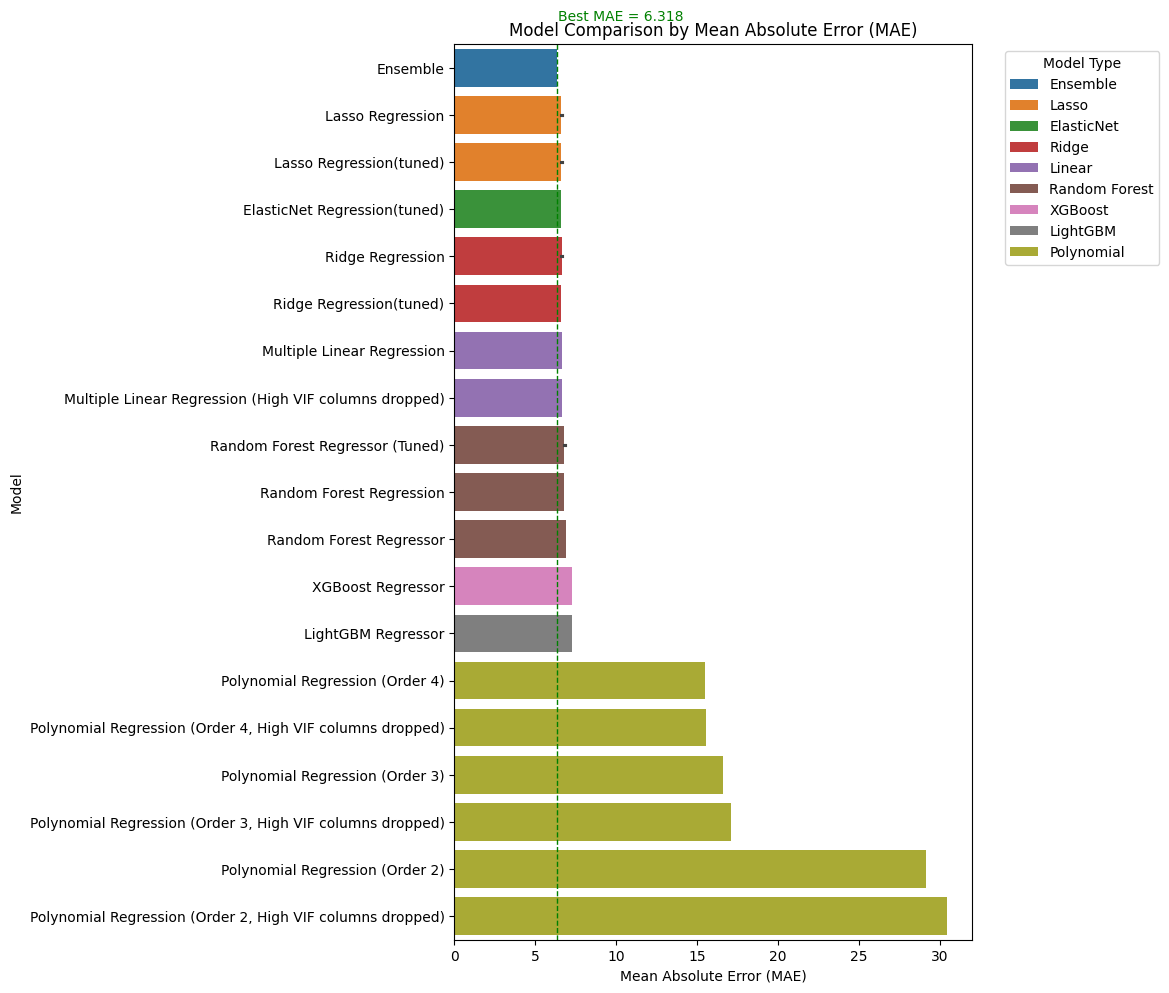

In [7]:
# We chose Ensemble of Ridge Lasso ElasticNet as final model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    "Model": [
        "Multiple Linear Regression", "Multiple Linear Regression (High VIF columns dropped)",
        "Polynomial Regression (Order 2)", "Polynomial Regression (Order 2, High VIF columns dropped)",
        "Polynomial Regression (Order 3)", "Polynomial Regression (Order 3, High VIF columns dropped)",
        "Polynomial Regression (Order 4)", "Polynomial Regression (Order 4, High VIF columns dropped)",
        "Random Forest Regressor", "Random Forest Regressor (Tuned)", "Random Forest Regressor (Tuned)",
        "Random Forest Regressor (Tuned)", "Random Forest Regressor (Tuned)", "Random Forest Regressor (Tuned)",
        "Random Forest Regressor (Tuned)", "XGBoost Regressor", "LightGBM Regressor",
        "Ridge Regression", "Lasso Regression", "Ridge Regression(tuned)", "Lasso Regression(tuned)",
        "Ridge Regression(tuned)", "Lasso Regression(tuned)", "ElasticNet Regression(tuned)",
        "Ridge Regression", "Lasso Regression", "Random Forest Regression", "Ensemble"
    ],
    "MAE": [
        6.6619, 6.6735, 29.1336, 30.449, 16.6254, 17.1186, 15.5107, 15.5209, 6.8736, 6.8051,
        6.8434, 6.7528, 6.7841, 6.7535, 6.7768, 7.2612, 7.2994, 6.6617, 6.6296, 6.6215,
        6.627, 6.6143, 6.585, 6.5851, 6.6137, 6.568, 6.7768, 6.3179
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Sort by MAE
df_sorted = df.sort_values("MAE", ascending=True)

# Assign model type for color coding
def categorize_model(name):
    name = name.lower()
    if "random forest" in name:
        return "Random Forest"
    elif "xgboost" in name:
        return "XGBoost"
    elif "lightgbm" in name:
        return "LightGBM"
    elif "lasso" in name:
        return "Lasso"
    elif "ridge" in name:
        return "Ridge"
    elif "elasticnet" in name:
        return "ElasticNet"
    elif "ensemble" in name:
        return "Ensemble"
    elif "polynomial" in name:
        return "Polynomial"
    else:
        return "Linear"

df_sorted["Category"] = df_sorted["Model"].apply(categorize_model)

# Plot
plt.figure(figsize=(12, 10))
palette = sns.color_palette("tab10", df_sorted["Category"].nunique())
sns.barplot(
    data=df_sorted, y="Model", x="MAE", hue="Category", dodge=False, palette=palette
)

# Highlight the best model
best_mae = df_sorted["MAE"].min()
plt.axvline(best_mae, color="green", linestyle="--", linewidth=1)
plt.text(best_mae + 0.1, -1, f"Best MAE = {best_mae:.3f}", color="green")

plt.title("Model Comparison by Mean Absolute Error (MAE)")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Model")
plt.legend(title="Model Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
